## What is meant by a decision tree?
“Decision Tree”的图片搜索结果
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

### What is decision tree and example?
A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions.

### What are the three types of decision tree?
There are 4 popular types of decision tree algorithms: ID3, CART (Classification and Regression Trees), Chi-Square and Reduction in Variance.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [3]:
data=sns.load_dataset('iris')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
X = data.drop(['species'], axis=1)
y = data['species']

In [8]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [10]:
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier 是一个能够在数据集上执行多类分类的类。 经拟合后，该模型可用于预测其他样本的类别：

In [14]:
cls_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
cls_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

#entropy：表示使用 ID3 算法（信息增益）构造决策树。
#gini：表示使用CART 算法（基尼系数）构造决策树，为默认值。

### max_depth： int or None, optional (default=None) 设置决策随机森林中的决策树的最大深度，深度越大，越容易过拟合，推荐树的深度为：5-20之间。

In [15]:
cls_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
cls_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred_gini = cls_gini.predict(X_test)
y_pred_gini

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [18]:
y_pred_entropy = cls_entropy.predict(X_test)
y_pred_entropy

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
# y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 1.0000


In [22]:
#Check for overfitting and underfitting:
print('Training set score: {0:.4f}'.format(cls_gini.score(X_train, y_train)))
print('Test set score: {0:.4f}'.format(cls_gini.score(X_test, y_test)))

Training set score: 0.9524
Test set score: 1.0000


In [23]:

print('Training set score: {:.4f}'.format(cls_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cls_entropy.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9778


[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.25, 0.375, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'gini = 0.059\nsamples = 33\nvalue = [0, 1, 32]')]

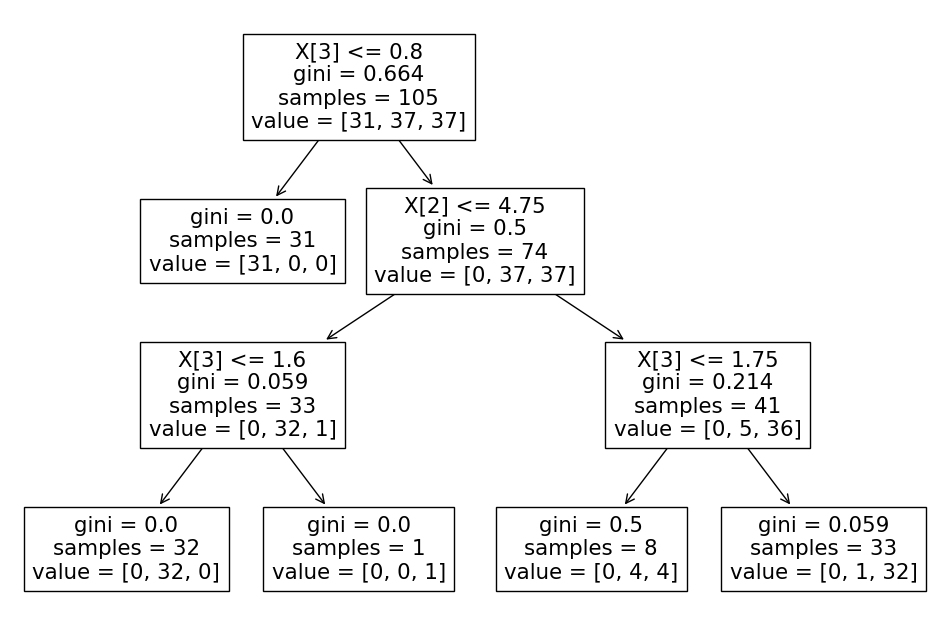

In [24]:
#Plot decision tree:
plt.figure(figsize=(12,8))
tree.plot_tree(cls_gini.fit(X_train, y_train))

[Text(0.3333333333333333, 0.9375, 'X[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2222222222222222, 0.6875, 'X[3] <= 1.6\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'X[2] <= 5.15\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.5555555555555556, 0.5625, 'X[3] <= 1.75\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.3333333333333333, 0.4375, 'X[1] <= 2.35\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'X[2] <= 5.05\nen

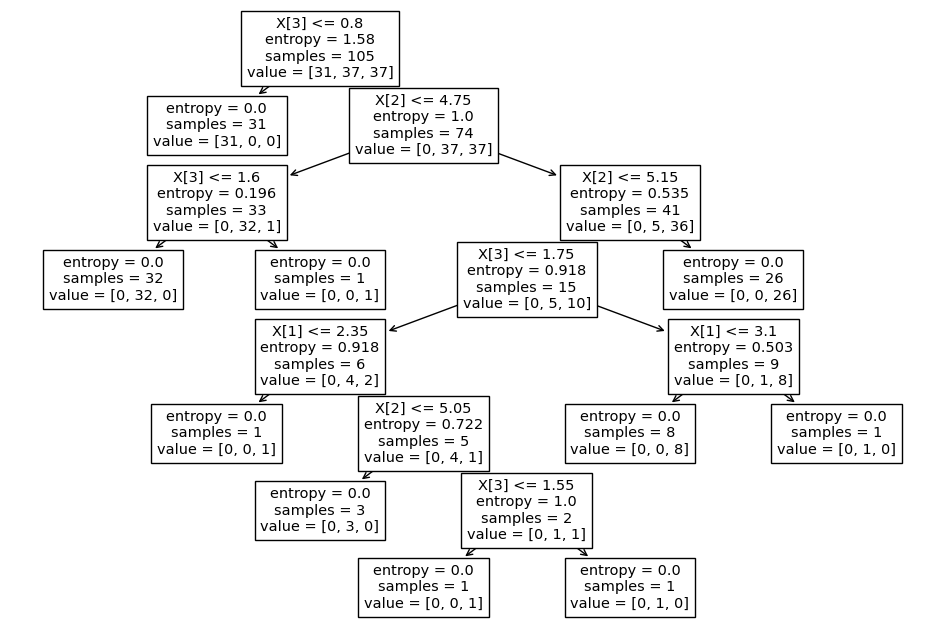

In [25]:
#Plot decision tree:
plt.figure(figsize=(12,8))
tree.plot_tree(cls_entropy.fit(X_train, y_train))